In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import pathlib
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
path_utk = 'C:/Users/jnave/Dropbox/My PC (LAPTOP-USDFL75P)/Downloads/summer_Internship'
path_face_cropped = 'C:/Users/jnave/Dropbox/My PC (LAPTOP-USDFL75P)/Downloads/summer_Internship/crop_part1'
path_face_cropped = pathlib.Path(path_face_cropped)
print(path_face_cropped)
print(len(str(path_face_cropped)))
image_count = len(list(path_face_cropped.glob('*.jpg')))
print(image_count)

C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)\Downloads\summer_Internship\crop_part1
85
9780


C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)\Downloads\summer_Internship\crop_part1\100_1_2_20170105174847679.jpg.chip.jpg


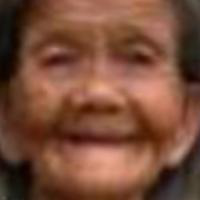

In [3]:
faces = list(path_face_cropped.glob('*.jpg'))
print(faces[1])
img1 = PIL.Image.open(str(faces[1]))
img1

In [4]:
batch = 32
img_height = 210
img_width = 210

In [5]:
age_class=['0-20','21-40','41-60','61-80','81-116']

In [6]:
print(faces[0])

C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)\Downloads\summer_Internship\crop_part1\100_1_0_20170110183726390.jpg.chip.jpg


In [7]:
df = pd.DataFrame(columns=['images','age','gender'])
for img in faces:
    new_img = str(img)
    img = new_img.split('\\')
#     print(img)
    img_name = img[8]
    img = img_name.split("_")
#     print(img)
    #Making 0 and 1 into male and female to make it more interpretable
    if img[1] == '0':
        img[1] = 'male'
    else:
        img[1] = 'female'
    #Making the age label into age ranges instead
    img[0] = int(img[0])
#     if int(img[0]) > 100:
#         img[0] = '101-116'
    if img[0] >80:
        img[0] = '81-116'
    elif img[0] > 60:
        img[0] = '61-80'
    elif img[0] > 40:
        img[0] = '41-60'
    elif img[0] > 20:
        img[0] = '21-40'
    else:
        img[0] = '0-20'    
    df2 = {'images':new_img,'age':img[0],'gender':img[1]}
    df = df.append(df2,ignore_index=True)
df

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\3044849163.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ip

,images,age,gender
0,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,81-116,female
1,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,81-116,female
2,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,81-116,female
3,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20,male
4,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20,male
...,...,...,...
9775,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20,female
9776,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20,female
9777,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20,female
9778,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20,female


In [8]:
df_data = df.images
y_data = df.age
y2_data = df.gender
X_train, X_test, y_train, y_test = train_test_split(df_data, y_data, test_size=0.2)

In [9]:
type(X_train)

pandas.core.series.Series

In [10]:
d = {'images':X_train,'age':y_train}
df_train = pd.concat(d,axis=1)
df_train.images

9443    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
4295    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
8042    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
9173    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
3922    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
                              ...                        
5404    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
8884    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
6359    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
2350    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
7721    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
Name: images, Length: 7824, dtype: object

In [11]:
df_data = df_train.images
y_data = df_train.age
y2_data = df.gender
X_train, X_val, y_train, y_val = train_test_split(df_data, y_data, test_size=0.2)

In [12]:
d = {'images':X_train,'age':y_train}
train = pd.concat(d,axis=1)
train

,images,age
6280,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,41-60
8340,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,61-80
4158,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
9154,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,81-116
7684,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
...,...,...
4626,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,21-40
7949,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,61-80
4904,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,21-40
1327,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20


In [13]:
train['age'].value_counts()

0-20      2728
21-40     1621
41-60     1064
61-80      610
81-116     236
Name: age, dtype: int64

In [14]:
d = {'images':X_val,'age':y_val}
val = pd.concat(d,axis=1)
val

,images,age
8457,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
7125,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,41-60
4228,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
5491,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
7873,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,61-80
...,...,...
444,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
8838,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,61-80
8564,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,61-80
2169,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20


In [15]:
d = {'images':X_test,'age':y_test}
df_test = pd.concat(d,axis=1)
df_test

,images,age
9498,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
6845,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,41-60
2113,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
6944,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,41-60
3779,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,21-40
...,...,...
691,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
9738,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,0-20
9152,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,81-116
8221,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,61-80


In [16]:
train_gen = ImageDataGenerator(#rotation_range=45,
                               rescale=1./255#,
                               #horizontal_flip=True
)
test_gen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_data = train_gen.flow_from_dataframe(dataframe = train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'age', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

test_data = test_gen.flow_from_dataframe(dataframe = df_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'age',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='sparse',
                                         target_size = (img_height,img_width))

val_data = train_gen.flow_from_dataframe(dataframe = val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'age', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

Found 6259 validated image filenames belonging to 5 classes.
Found 1956 validated image filenames belonging to 5 classes.
Found 1565 validated image filenames belonging to 5 classes.


In [18]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
conv_layer_32 = layers.Conv2D(32,(3,3),activation='relu')
conv_layer_64 = layers.Conv2D(64,3,activation='relu')
conv_layer_16 = layers.Conv2D(16,3,activation='relu')
max_pool = layers.MaxPooling2D()
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [19]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 210, 210, 3)
(32,)


In [20]:
for image_batch, labels_batch in val_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 210, 210, 3)
(32,)


In [21]:
num_classes = 5

model = tf.keras.Sequential([
  normalization_layer,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  #
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  #  
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  #layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [23]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs= 50,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/50
196/196 [==============================] - 290s 1s/step - loss: 1.2251 - accuracy: 0.4923 - val_loss: 1.0602 - val_accuracy: 0.5604
Epoch 2/50
196/196 [==============================] - 270s 1s/step - loss: 1.0114 - accuracy: 0.5828 - val_loss: 0.9748 - val_accuracy: 0.5783
Epoch 3/50
196/196 [==============================] - 270s 1s/step - loss: 0.9235 - accuracy: 0.6134 - val_loss: 0.9119 - val_accuracy: 0.6064
Epoch 4/50
196/196 [==============================] - 270s 1s/step - loss: 0.8737 - accuracy: 0.6370 - val_loss: 0.9212 - val_accuracy: 0.6198
Epoch 5/50
196/196 [==============================] - 269s 1s/step - loss: 0.8436 - accuracy: 0.6509 - val_loss: 0.8611 - val_accuracy: 0.6441
Epoch 6/50
196/196 [==============================] - 269s 1s/step - loss: 0.8070 - accuracy: 0.6672 - val_loss: 0.8362 - val_accuracy: 0.6524
Epoch 7/50
196/196 [==============================] - 269s 1s/step - loss: 0.7759 - accuracy: 0.6808 - val_loss: 0.8255 - val_accuracy: 0.6626

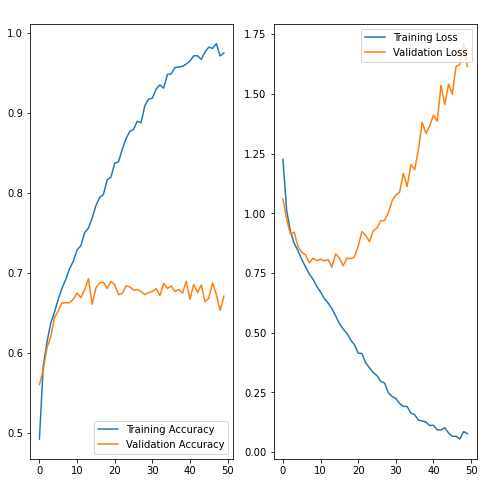

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 30

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eff_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.show()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None)  0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, None)              0         
                                                                 
 dense (Dense)               (None, 128)               44302464  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

In [26]:
results_age = model.evaluate(test_data)
print("test loss, test acc:", results_age)

62/62 [==============================] - 22s 353ms/step - loss: 1.7919 - accuracy: 0.6488
test loss, test acc: [1.79189133644104, 0.6487730145454407]


In [27]:
df_data = df.images
y2_data = df.gender
X_train, X_test, y_train, y_test = train_test_split(df_data, y2_data, test_size=0.2)

In [28]:
d = {'images':X_train,'gender':y_train}
df_train2 = pd.concat(d,axis=1)
df_train2.images

2319    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
7772    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
9261    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
5916    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
1156    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
                              ...                        
7046    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
6956    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
8683    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
6674    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
1382    C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...
Name: images, Length: 7824, dtype: object

In [29]:
df_data = df_train2.images
y2_data = df_train2.gender
X_train, X_val, y_train, y_val = train_test_split(df_data, y2_data, test_size=0.2)

In [30]:
d = {'images':X_train,'gender':y_train}
train = pd.concat(d,axis=1)
train

,images,gender
6677,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
8610,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
6623,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male
685,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male
6036,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male
...,...,...
6324,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male
1587,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male
498,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
1213,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female


In [31]:
d = {'images':X_val,'gender':y_val}
val = pd.concat(d,axis=1)
val

,images,gender
3846,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
2490,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
3032,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
3830,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
5862,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
...,...,...
8659,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
4430,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
6246,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male
213,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male


In [32]:
d = {'images':X_test,'gender':y_test}
df_test = pd.concat(d,axis=1)
df_test

,images,gender
8494,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
8946,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
8365,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male
9208,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
8054,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,male
...,...,...
8796,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
6075,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
4246,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female
2652,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,female


In [33]:
train_data = train_gen.flow_from_dataframe(dataframe = train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

test_data = test_gen.flow_from_dataframe(dataframe = df_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'gender',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='categorical',
                                         target_size = (img_height,img_width))

val_data = train_gen.flow_from_dataframe(dataframe = val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

Found 6259 validated image filenames belonging to 2 classes.
Found 1956 validated image filenames belonging to 2 classes.
Found 1565 validated image filenames belonging to 2 classes.


In [34]:
num_classes = 2

model2 = tf.keras.Sequential([
  normalization_layer,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  #
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [36]:
history = model2.fit(
    train_data,
    validation_data=val_data,
    epochs= 50,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/50
196/196 [==============================] - 529s 3s/step - loss: 0.6509 - accuracy: 0.6047 - val_loss: 0.6080 - val_accuracy: 0.6613
Epoch 2/50
196/196 [==============================] - 523s 3s/step - loss: 0.5943 - accuracy: 0.6688 - val_loss: 0.6068 - val_accuracy: 0.6665
Epoch 3/50
196/196 [==============================] - 523s 3s/step - loss: 0.5493 - accuracy: 0.7110 - val_loss: 0.5134 - val_accuracy: 0.7335
Epoch 4/50
196/196 [==============================] - 522s 3s/step - loss: 0.5085 - accuracy: 0.7407 - val_loss: 0.4978 - val_accuracy: 0.7425
Epoch 5/50
196/196 [==============================] - 523s 3s/step - loss: 0.4722 - accuracy: 0.7703 - val_loss: 0.4660 - val_accuracy: 0.7712
Epoch 6/50
196/196 [==============================] - 523s 3s/step - loss: 0.4563 - accuracy: 0.7805 - val_loss: 0.4655 - val_accuracy: 0.7674
Epoch 7/50
196/196 [==============================] - 522s 3s/step - loss: 0.4498 - accuracy: 0.7813 - val_loss: 0.4615 - val_accuracy: 0.7732

In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None)  0         
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    1792      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               88604800  
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                      

In [38]:
results_gender = model2.evaluate(test_data)
print("test loss, test acc:", results_gender)

62/62 [==============================] - 29s 475ms/step - loss: 0.5056 - accuracy: 0.7986
test loss, test acc: [0.5056268572807312, 0.7985684871673584]


In [39]:
path_ck= 'C:/Users/jnave/Dropbox/My PC (LAPTOP-USDFL75P)/Downloads/archive/CK+48/'

path_ck = pathlib.Path(path_ck)
print(path_ck)
print(len(str(path_ck)))

#Images in this dataset are saved as .png
image_count = len(list(path_ck.glob('*/*.png')))
print(image_count)

C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)\Downloads\archive\CK+48
70
981


In [40]:
emotion_class = os.listdir(path_ck)
emotion_class

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [41]:
surprise = len(list(path_ck.glob('surprise/*.png')))
print(surprise)
fear = len(list(path_ck.glob('fear/*.png')))
print(fear)
sadness = len(list(path_ck.glob('sadness/*.png')))
print(sadness)
disgust = len(list(path_ck.glob('disgust/*.png')))
print(disgust)
contempt = len(list(path_ck.glob('contempt/*.png')))
print(contempt)
happy = len(list(path_ck.glob('happy/*.png')))
print(happy)
anger = len(list(path_ck.glob('anger/*.png')))
print(anger)

249
75
84
177
54
207
135


In [42]:
emotion_df = pd.DataFrame(columns=['images','emotion'])
for label in emotion_class:
    for image in list(path_ck.glob(label+'/*.png')):
        df2 = {'images':str(image),'emotion':label}
        emotion_df = emotion_df.append(df2,ignore_index=True)
emotion_df

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(df2,ignore_index=True)
C:\Users\jnave\AppData\Local\Temp\ipykernel_25740\1707625833.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append

,images,emotion
0,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
1,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
2,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
3,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
4,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
...,...,...
976,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
977,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
978,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
979,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise


In [43]:
emotion_df = emotion_df.sample(frac=1)
emotion_df

,images,emotion
332,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
766,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
226,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
380,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,fear
582,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
...,...,...
878,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
8,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
92,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
252,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust


In [44]:
emotion_data = emotion_df.images
y_data = emotion_df.emotion
X_train, X_test, y_train, y_test = train_test_split(emotion_data, y_data, test_size=0.2)

In [45]:
d3 = {'images':X_train,'emotion':y_train}
emotion_train = pd.concat(d3,axis=1)
emotion_train

,images,emotion
625,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
607,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
535,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
478,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
370,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,fear
...,...,...
7,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
266,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
45,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
322,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust


In [46]:
d3 = {'images':X_test,'emotion':y_test}
emotion_test = pd.concat(d3,axis=1)
emotion_test

,images,emotion
872,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
222,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
303,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
349,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
393,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,fear
...,...,...
768,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
13,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
526,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
945,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise


In [47]:
emotion_test['emotion'].value_counts()

surprise    52
disgust     43
happy       37
sadness     21
anger       19
fear        13
contempt    12
Name: emotion, dtype: int64

In [48]:
occurences_test = list(emotion_test['emotion'].value_counts())
tot = sum(occurences_test)
occurences_test = [el/tot for el in occurences_test]
occurences_test

[0.2639593908629442,
 0.2182741116751269,
 0.18781725888324874,
 0.1065989847715736,
 0.09644670050761421,
 0.06598984771573604,
 0.06091370558375635]

In [49]:
emotion_data = emotion_train.images
y_data = emotion_train.emotion
X_train, X_val, y_train, y_val = train_test_split(emotion_data, y_data, test_size=0.2)

In [50]:
d3 = {'images':X_val,'emotion':y_val}
emotion_val = pd.concat(d3,axis=1)
emotion_val

,images,emotion
218,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
588,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
75,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
554,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
309,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
...,...,...
107,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
248,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
335,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
25,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger


In [51]:
emotion_val['emotion'].value_counts()

surprise    52
happy       30
disgust     25
anger       19
sadness     15
fear        12
contempt     4
Name: emotion, dtype: int64

In [52]:
occurences_val = list(emotion_val['emotion'].value_counts())
tot = sum(occurences_val)
occurences_val = [el/ tot for el in occurences_val]
occurences_val

[0.33121019108280253,
 0.1910828025477707,
 0.1592356687898089,
 0.12101910828025478,
 0.09554140127388536,
 0.07643312101910828,
 0.025477707006369428]

In [53]:
d3 = {'images':X_train,'emotion':y_train}
emotion_train = pd.concat(d3,axis=1)
emotion_train

,images,emotion
202,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,disgust
469,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,happy
958,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
772,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
961,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
...,...,...
102,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger
840,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
937,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,surprise
126,C:\Users\jnave\Dropbox\My PC (LAPTOP-USDFL75P)...,anger


In [54]:
emotion_train['emotion'].value_counts()

surprise    145
happy       140
disgust     109
anger        97
fear         50
sadness      48
contempt     38
Name: emotion, dtype: int64

In [55]:
occurences_train = list(emotion_train['emotion'].value_counts())
tot = sum(occurences_train)
occurences_train = [el/tot for el in occurences_train]
occurences_train

[0.23125996810207336,
 0.22328548644338117,
 0.17384370015948963,
 0.1547049441786284,
 0.07974481658692185,
 0.07655502392344497,
 0.06060606060606061]

In [56]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale = 1./255)

In [57]:
train = train_gen.flow_from_dataframe(dataframe = emotion_train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'emotion', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

test = test_gen.flow_from_dataframe(dataframe = emotion_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'emotion',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='sparse',
                                         target_size = (img_height,img_width))

val = train_gen.flow_from_dataframe(dataframe = emotion_val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'emotion', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

Found 627 validated image filenames belonging to 7 classes.
Found 197 validated image filenames belonging to 7 classes.
Found 157 validated image filenames belonging to 7 classes.


In [58]:
num_classes = 7

model3 = tf.keras.Sequential([
  normalization_layer,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [59]:
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [61]:
history = model3.fit(
    train,
    validation_data=val,
    epochs= 15,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/15
20/20 [==============================] - 28s 1s/step - loss: 0.0260 - accuracy: 0.9968 - val_loss: 0.0864 - val_accuracy: 0.9745
Epoch 2/15
20/20 [==============================] - 27s 1s/step - loss: 0.0137 - accuracy: 0.9968 - val_loss: 0.0532 - val_accuracy: 0.9809
Epoch 3/15
20/20 [==============================] - 27s 1s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9873
Epoch 4/15
20/20 [==============================] - 27s 1s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9873
Epoch 5/15
20/20 [==============================] - 27s 1s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9936
Epoch 6/15
20/20 [==============================] - 27s 1s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9936
Epoch 7/15
20/20 [==============================] - 27s 1s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9936
Epoch 8/15
20/20 [==

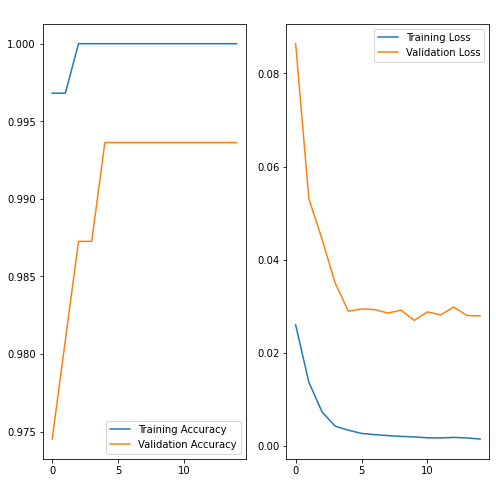

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 30

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eff_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.show()

In [63]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None)  0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               44302464  
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                      

In [64]:
results_emotion = model3.evaluate(test)
print("test loss, test acc:", results_emotion)

7/7 [==============================] - 2s 275ms/step - loss: 0.0651 - accuracy: 0.9898
test loss, test acc: [0.06514421850442886, 0.989847719669342]


In [65]:
pic_path = 'C:/Users/jnave/Dropbox/My PC (LAPTOP-USDFL75P)/Downloads/screen-shot-2019-02-15-at-19-16-58-720x720.jpg'

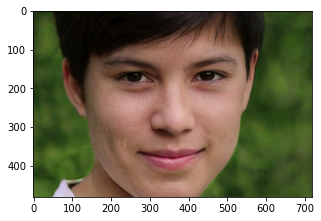

In [66]:
plt.figure(figsize=(5,5))
img = PIL.Image.open(pic_path)
plt.imshow(img)

In [67]:
img = tf.keras.preprocessing.image.load_img(
    pic_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [68]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(age_class[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 810ms/step
This image most likely belongs to 0-20 with a 100.00 percent confidence.


In [69]:
gender_class = ['male','female']
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(gender_class[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 188ms/step
This image most likely belongs to female with a 100.00 percent confidence.


In [70]:
predictions = model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(emotion_class[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 94ms/step
This image most likely belongs to disgust with a 100.00 percent confidence.
